<link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Sofia">
<style>
  @import url('https://fonts.googleapis.com/css2?family=Concert+One&display=swap');
  .topic {
    text-align: center;
    font-weight: 900;
    font-size: 50px;
    text-shadow: 3px 3px 3px #ababab;
    font-family: 'Concert One', sans-serif;
  }
  @import url('https://fonts.googleapis.com/css2?family=Lobster&display=swap');
  .info {
    text-align: center;
    font-weight: 800;
    font-size: 40px;
    font-family: 'Lobster', sans-serif;
  }
</style>

<h1 class=topic>Google Analytics Customer Revenue Prediction</h1>
<h2 class=info>Vũ Minh Phát - 21127739</h2>

___

<class style="font-family: 'Pacifico', cursive;">

# **1. <u>GIỚI THIỆU BÀI TOÁN</u>**

</class>

<class style="font-size: 20px;">

* Nguyên tắc 80/20 (còn được gọi là **`"Pareto Principle"`**) khẳng định rằng 80% các kết quả (hoặc kết quả đầu ra) là kết quả của 20% của tất cả các nguyên nhân (hoặc đầu vào) cho một sự kiện nhất định. Nguyên tắc này được chứng minh là đúng trong hầu hết lĩnh vực kinh doanh, nghĩa là khoảng 80% doanh thu của chúng ta sẽ chỉ được tạo ra bởi 20% lượng khách hàng tiềm năng.

* Vì vậy, mục tiêu của chúng ta là dự đoán doanh thu sẽ được tạo ra bởi những khách hàng tiềm năng trong tương lai gần. Điều này giúp cho các nhóm marketing đầu tư một khoản tiền phù hợp vào các chiến lược quảng cáo để thu hút các khách hàng tiềm năng.

* Đơn giản mà nói, chúng ta được cung cấp dữ liệu và giao dịch trong quá khứ của một số người dùng (khi họ đăng nhập vào GStore). Và, bằng cách sử dụng dữ liệu này, chúng ta cần dự đoán doanh thu tương lai sẽ được tạo ra bởi những khách hàng đó.

* Google đã cung cấp bộ dữ liệu khách hàng và số lượng giao dịch cho mỗi khách hàng. Chúng ta sẽ xây dựng một mô hình dự đoán sử dụng bộ dữ liệu GStore để dự đoán tổng doanh thu trên mỗi khách hàng giúp cho việc sử dụng ngân sách tiếp thị tốt hơn và chúng ta cũng sẽ giải thích yếu tố ảnh hưởng nhất đến dự đoán tổng doanh thu bằng các mô hình khác nhau.

</class>

___

<class style="font-family: 'Comic Sans MS', 'Comic Sans', cursive;">

# **2. <u>GIỚI THIỆU VỀ TẬP DỮ LIỆU ĐƯỢC CUNG CẤP</u>**

</class>

## **2.1. Tổng quan**

<class style="font-size: 20px;">

* Đường dẫn tới tập dữ liệu: https://www.kaggle.com/competitions/ga-customer-revenue-prediction/data

* Ta sẽ chỉ sử dụng 1 file: `train.csv`. Vì:
    * Nhìn chung, các tập dữ liệu phiên bản 2 (*_v2.csv) gần như giống hoàn toàn với phiên bản đang sử dụng nên việc phân tích dữ liệu trên 2 phiên bản cũng không quá khác biệt.
    
    * Do những hạn chế về phần cứng máy tính nên việc thao tác với ~25GB dữ liệu từ `train_v2.csv` sẽ mất rất nhiều thời gian so với ~1.5GB dữ liệu từ `train.csv`.

* Trên lý thuyết, ta cần dự đoán giá trị mục tiêu cho mỗi người dùng trong `test.csv`. Nhưng đây không phải cuộc thi nên ta sẽ KHÔNG dùng tập dữ liệu này để đánh giá kết quả của mô hình học máy.

* Mỗi dòng trong tập dữ liệu thể hiện cho 1 lần mà người dùng truy cập vào GStore, chúng được phân biệt với nhau thông qua mã định danh. Nghĩa là, để xác định tổng giá trị giao dịch của họ ta cần gom nhóm các người dùng dựa trên mã định danh riêng của họ.

</class>

## **2.2. Thời gian thu thập dữ liệu**

<class style="font-size: 20px;">

* Tập `train.csv`: chứa các giao dịch từ ngày 01/08/2016 đến 01/08/2017.

</class>

## **2.3. Các trường (cột) trong tập dữ liệu**

<class style="font-size: 20px;">

Reference: https://support.google.com/analytics/answer/3437719?hl=en-GBanswer=1686200

* **`channelGrouping`** - Kênh mà người dùng đã truy cập đến GStore.

* **`date`** - Ngày mà người dùng truy cập vào GStore.

* **`device`** - Thông số kỹ thuật của thiết bị được sử dụng để truy cập GStore.

* **`fullVisitorId`** - Mã định danh riêng của mỗi người dùng của Google Merchandise Store.

* **`geoNetwork`** - Thông tin vị trí địa lý của người dùng.

* **`sessionId`** - Được tạo thành từ **`fullVisitorId`** và **`visitId`**.

* **`socialEngagementType`** - "Socially Engaged" hoặc "Not Socially Engaged".

* **`totals`** - Chứa giá trị tổng hợp trong suốt phiên ghé thăm.

* **`trafficSource`** - Thông tin về Traffic Source mà phiên bắt đầu.

* **`visitId`** - Mã định danh của mỗi phiên, chỉ dành riêng cho người dùng.

* **`visitNumber`** - Số lượng phiên của từng người dùng. Nếu đây là phiên đầu tiên thì giá trị này được đặt thành 1. Giá trị này tăng dần sau mỗi lần người dùng truy cập đến trang web.

* **`visitStartTime`** - Timestamp (được biểu thị bằng thời gian POSIX).

</class>

___

# ----- END CHAPTER 01 -----

<class style="font-family: 'Comic Sans MS', 'Comic Sans', cursive;">

# **3. <u>Các thư viện cần sử dụng</u>**

</class>

In [11]:
# Import Section
import numpy as np
import pandas as pd
from pandas import json_normalize
import json
from zipfile import ZipFile
import tqdm
import datetime
import re

# Import matplotlib & seaborn for visualisation
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools

init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
%matplotlib inline

<class style="font-family: 'Comic Sans MS', 'Comic Sans', cursive;">

# **4. <u>Đọc dữ liệu từ file</u>**

</class>

## 4.1. Xây dựng hàm đọc dữ liệu

In [2]:
# ********** A USEFUL WAY TO READ VERY LARGE DATASETS COMPRESSED IN ZIP FILES **********
#
#   1.  After downloading the data from Kaggle, we will have a zip file
#           which contain our dataset in csv format.
#
#   2.  Because of (very) large size of the dataset, we will not extract the zip file
#           which help us to save our disk space.
#
#   3.  To read file csv in size the zip file, we will use ZipFile library.
#           so we need to define the path to the zip file.
#
#   4.  After that, we can use pandas to read the csv file like normal.
#
# Read more at: https://favtutor.com/blogs/zipfile-python#:~:text=How%20to%20read%20a%20zip,that%20we%20want%20to%20read.
# **************************************************************************************
ZIP_FILE_PATH = '../data/raw/ga-customer-revenue-prediction.zip'

In [6]:
def read_data_inside_zip_file(filename: str, zip_file_path: str = ZIP_FILE_PATH) -> pd.DataFrame:
    """Read the csv file inside the zip file
    
    Notes:
        zip_file_path is the path to the zip file containing the csv file

    Returns:
        pd.DataFrame: dataframe of 'filename' inside the zip file
    """
    with ZipFile(zip_file_path) as zf:      # Open the zip file with mode 'r'
        with zf.open(filename) as file:     # Open 'filename' inside the zip file
            df = pd.read_csv(file)          # Read data from 'filename'
                                            #   => Q: Why NOT set low_memory=False to solve DtypeWarning?
                                            #      A: Read at: https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

    return df

## 4.2. Đọc dữ liệu

In [6]:
# Read the data
train_df = read_data_inside_zip_file('train.csv')

/tmp/ipykernel_1220/1298650587.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)          # Read data from 'filename'


> Khi sử dụng `read_csv()` từ `Pandas`, thông báo `DtypeWarning` xuất hiện 
> đồng nghĩa với việc file dữ liệu có (ít nhất) 1 cột bao gồm nhiều kiểu dữ liệu (dtype).

Cột gây ra thông báo là:

In [20]:
# Columns (3) give DtypeWarning -> corresponding index is 3
print(f"=> Column give DtypeWarning: {train_df.columns[3]}")

=> Column give DtypeWarning: fullVisitorId


> Trong trường hợp này, cột `fullVisitorId` là nguyên nhân của thông báo trên. Ta sẽ quan sát toàn bộ dữ liệu đã đọc và tìm cách xử lý.

Ta xem một vài thông tin về tập dữ liệu:

In [18]:
train_df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,20160902,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


> * Dữ liệu có `903653 dòng` và `12 cột`:
>   * Mỗi dòng ứng với 1 phiên truy cập tới GStore từ người dùng.
>
>   * Mỗi cột tương ứng 1 thuộc tính đã được đề cập bên trên.
>
>   * Hơn thế nữa, ta không thấy `cell` nào bị thiếu dữ liệu.
>
> * Các cột: `device`, `geoNetwork`, `totals` và `trafficSource` 
> hiện đang lưu trữ dữ liệu dưới dạng `JSON` nên ta có thể 
> *"làm phẳng"* chúng để thuận tiện thao tác.

## 4.3. Đọc dữ liệu và làm phẳng

Ta có thể sử dụng đoạn code của [DATAISTA0 (JULIÁN PELLER)](https://www.kaggle.com/code/julian3833/1-quick-start-read-csv-and-flatten-json-fields/notebook) để thực hiện việc này.

In [3]:
# From: https://www.kaggle.com/julian3833/1-quick-start-read-csv-and-flatten-json-fields
def read_data_and_flatten(filename: str, nrows: int = None, 
                          zip_file_path: str = ZIP_FILE_PATH) -> pd.DataFrame:
    """Read the csv file inside the zip file and flatten json columns"""
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    with ZipFile(zip_file_path) as zf:
        with zf.open(filename) as file:
            df = pd.read_csv(file,
                             # Create JSON object for every json column
                             converters={col: json.loads for col in JSON_COLUMNS},
                             # Important!! Considering 'fullvisitor id as string'
                             dtype={'fullVisitorId': 'str'},
                             nrows=nrows)
            
    with tqdm.tqdm(total=len(JSON_COLUMNS)) as pbar:
        pbar.set_description(f"Flattening process")
        for column in JSON_COLUMNS:
            # json_normalize will return a flatten dataframe of json columns
            column_as_df = json_normalize(df[column])
            # Get column names
            column_as_df.columns = [f"{column}.{subcolumn}" for subcolumn in column_as_df.columns]
            # Drop JSON columns and merge data frame with parsed columns
            df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
            
            pbar.update(1)
    
    print(f">> Loaded '{filename}' with shape: {df.shape}")
    return df

In [4]:
# Read the data
train_df = read_data_and_flatten('train.csv')

Flattening process: 100%|██████████| 4/4 [00:48<00:00, 12.16s/it]

>> Loaded 'train.csv' with shape: (903653, 55)


> Ta thấy tham số `dtype={'fullVisitorId': 'str'}` trong hàm `read_csv()` giúp
> thông báo `DtypeWarning` không còn xuất hiện.

Bây giờ ta sẽ quan sát dữ liệu sau khi biến đổi:

In [5]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,...,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,not available in demo dataset,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 31 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   channelGrouping                               903653 non-null  object
 1   date                                          903653 non-null  int64 
 2   fullVisitorId                                 903653 non-null  object
 3   sessionId                                     903653 non-null  object
 4   visitId                                       903653 non-null  int64 
 5   visitNumber                                   903653 non-null  int64 
 6   visitStartTime                                903653 non-null  int64 
 7   device.browser                                903653 non-null  object
 8   device.operatingSystem                        903653 non-null  object
 9   device.isMobile                               903653 non-nu

> * Hiện tai, dữ liệu được mở rộng thành `903653 dòng` và `55 cột`:
>   * Các cột: `device`, `geoNetwork`, `totals` và `trafficSource`
> đạ được tách thành các cột nhỏ hơn và có thể phân biệt thông
> qua ký hiệu `*.*`
>
>   * Tuy nhiên, `55 cột` là quá nhiều nên ta cần giảm bớt độ 
> rộng của dữ liệu.
>
>   **⇨** Ta quan sát thấy 1 vài `entry` bị thiếu dữ liệu và sẽ tìm cách xử lý.

## 4.4. Phân tích tổng quát kết quả

Các cột thiếu dữ liệu HOÀN TOÀN

In [8]:
cols_with_completely_missing = [col 
                                for col in train_df.columns 
                                if train_df[col].isnull().all()]
cols_with_completely_missing

[]

> Suy ra, không có cột nào hoàn toàn thiếu dữ liệu .
> Nghĩa là, không có cột nào chỉ chứa "giá trị" `NaN`.

Các cột chỉ có duy nhất 1 giá trị

In [5]:
cols_with_unique_value = [col 
                          for col in train_df.columns 
                          if train_df[col].nunique(dropna=True) == 1]
cols_with_unique_value

['socialEngagementType',
 'device.browserVersion',
 'device.browserSize',
 'device.operatingSystemVersion',
 'device.mobileDeviceBranding',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.flashVersion',
 'device.language',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'totals.bounces',
 'totals.newVisits',
 'trafficSource.adwordsClickInfo.criteriaParameters',
 'trafficSource.isTrueDirect',
 'trafficSource.adwordsClickInfo.isVideoAd',
 'trafficSource.campaignCode']

> * Trên lý thuyết, các cột chỉ có DUY NHẤT 1 giá trị (khác NaN) 
> thì cũng không có ý nghĩa gì khi dùng để dự đoán kết quả.
>
> * Do đó, ta có thể xóa các cột này để thu hẹp phạm vi dữ liệu.

Xóa các cột chỉ có 1 giá trị duy nhất

In [6]:
# Drop columns with unique value
train_df.drop(cols_with_unique_value, axis='columns', inplace=True)

Khi này dữ liệu còn lại:

In [11]:
train_df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.operatingSystem,device.isMobile,...,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adContent
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,Windows,False,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,Macintosh,False,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,Windows,False,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,Linux,False,...,(not set),google,organic,google + online,NaN,NaN,NaN,NaN,NaN,NaN
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,Android,True,...,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 31 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   channelGrouping                               903653 non-null  object
 1   date                                          903653 non-null  int64 
 2   fullVisitorId                                 903653 non-null  object
 3   sessionId                                     903653 non-null  object
 4   visitId                                       903653 non-null  int64 
 5   visitNumber                                   903653 non-null  int64 
 6   visitStartTime                                903653 non-null  int64 
 7   device.browser                                903653 non-null  object
 8   device.operatingSystem                        903653 non-null  object
 9   device.isMobile                               903653 non-nu

> Khi này, số dòng không đổi nhưng dữ liệu chỉ còn `31 cột` và có 1 vài `entry` bị thiếu dữ liệu.

Ta lưu lại dữ liệu này để backup

In [8]:
train_df.to_csv('../data/interim/flat_reduced_train_.csv', index=False, na_rep='None')

In [9]:
# Đọc dữ liệu đã được làm phẳng và giảm số lượng cột (nếu cần)
train_df = pd.read_csv('../data/interim/flat_reduced_train_.csv', dtype={'fullVisitorId': 'str'})

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 31 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   channelGrouping                               903653 non-null  object 
 1   date                                          903653 non-null  int64  
 2   fullVisitorId                                 903653 non-null  object 
 3   sessionId                                     903653 non-null  object 
 4   visitId                                       903653 non-null  int64  
 5   visitNumber                                   903653 non-null  int64  
 6   visitStartTime                                903653 non-null  int64  
 7   device.browser                                903653 non-null  object 
 8   device.operatingSystem                        903653 non-null  object 
 9   device.isMobile                               90

___

Ta phân tích tình trạng thiếu dữ liệu của các cột còn lại

In [12]:
# From: https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset

# Check how much percentage of missing data in each colummn:
percent_missing = train_df.isnull().sum() * 100 / train_df.shape[0]
missing_value_df = pd.DataFrame({'column_name': train_df.columns,
                                 'percent_missing': percent_missing})

missing_value_df.sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
trafficSource.adContent,trafficSource.adContent,98.788694
totals.transactionRevenue,totals.transactionRevenue,98.725728
trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.page,97.625195
trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.slot,97.625195
trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.adNetworkType,97.625195
trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.gclId,97.614018
trafficSource.referralPath,trafficSource.referralPath,63.377425
trafficSource.keyword,trafficSource.keyword,55.655102
totals.pageviews,totals.pageviews,0.011066
date,date,0.000000


Ta có thể biễu diễn dưới dạng đồ thị để dễ quan sát hơn

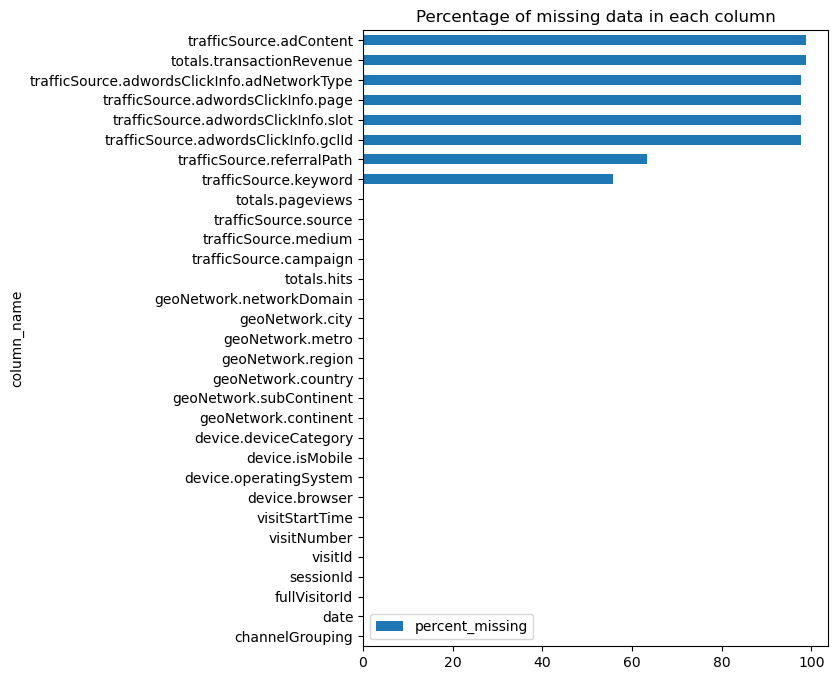

In [21]:
missing_value_df.sort_values(by='percent_missing', ascending=True)\
                    .plot.barh(x='column_name',
                               y='percent_missing',
                               figsize=(6, 8),
                               title='Percentage of missing data in each column');

## 4.5. Phân tích cụ thể từng cột bị thiếu giá trị

trafficSource.adContent	trafficSource.adContent	98.788694
totals.transactionRevenue	totals.transactionRevenue	98.725728
trafficSource.adwordsClickInfo.page	trafficSource.adwordsClickInfo.page	97.625195
trafficSource.adwordsClickInfo.slot	trafficSource.adwordsClickInfo.slot	97.625195
trafficSource.adwordsClickInfo.adNetworkType	trafficSource.adwordsClickInfo.adNetworkType	97.625195
trafficSource.adwordsClickInfo.gclId	trafficSource.adwordsClickInfo.gclId	97.614018
trafficSource.referralPath	trafficSource.referralPath	63.377425
trafficSource.keyword	trafficSource.keyword	55.655102
totals.pageviews	totals.pageviews	0.011066

* `trafficSource.adContent`

Definition: Traffic source in the simplest form can be defined as the origin through which people found your site. Every session or visit to your website has origin or source of the hit. Whenever someone visits your website through desktop, mobile or any Internet-enabled device, the Web & Google Analytics track its source or origin, which is classified as traffic source.

Ta quan sát các giá trị khác nhau có trong cột này

In [22]:
train_df['trafficSource.adContent'].unique()

array([nan, 'Full auto ad IMAGE ONLY', 'First Full Auto Template Test Ad',
       '{KeyWord:Google Brand Items}', 'Display Ad created 3/11/14',
       'Ad from 11/7/16', 'Display Ad created 3/11/15',
       'Ad from 12/13/16', 'Ad from 11/3/16', 'Google Online Store',
       'Google Merchandise Collection', '{KeyWord:Want Google Stickers?}',
       '{KeyWord:Google Merchandise}', 'Display Ad created 11/17/14',
       '{KeyWord:Google Drinkware}', "{KeyWord:Google Men's T-Shirts}",
       '{KeyWord:Google Branded Gear}',
       '{KeyWord:Google Branded Apparel}', 'Google Paraphernalia',
       'Swag with Google Logos', '{KeyWord:Google Branded Kit}',
       'Want Google Sunglasses', '{KeyWord:Looking for Google Bags?}',
       'Full auto ad TEXT ONLY', 'Google Merchandise', 'google store',
       'LeEco_1a', 'Full auto ad TEXT/NATIVE',
       '{KeyWord:Want Google Pet Toys?}', 'Google Store',
       "Men's-Outerwear Google Apparel", '20% discount',
       'Full auto ad with Primary Colo

> * Tuy cột này có hơn `98%` lượng dữ liệu bị thiếu, nhưng 
> các dữ liệu quan sát được dường như có vẻ hữu ích về
> loại quảng cáo mà người dùng thấy và khiến họ truy 
> cập đến cửa hàng.
>
> * Ngoài ra, ta còn thấy một vài giá trị giống nhau về mặt
> ngữ nghĩa nhưng chỉ khác nhau về cách viết như: `'Google Store'`, 
> `'Google store'`, `'google store'`. Ta sẽ tìm cách gom nhóm
> các cụm từ đồng nghĩa để hạn chế sự phân tán dữ liệu.
>
> * Với một số giá trị xuất hiện quá ít hoặc bị thiếu,
> ta có thể gom chúng thành 1 nhóm `'Other'`.

* `totals.transactionRevenue`

Ta xem các giá trị có trong cột này

In [29]:
train_df['totals.transactionRevenue'].describe()

count    1.151500e+04
mean     1.337448e+08
std      4.482852e+08
min      1.000000e+04
25%      2.493000e+07
50%      4.945000e+07
75%      1.076550e+08
max      2.312950e+10
Name: totals.transactionRevenue, dtype: float64

In [27]:
train_df['totals.transactionRevenue'].unique()

array([       nan, 3.7860e+07, 3.0667e+08, ..., 3.3526e+08, 3.0750e+07,
       6.9390e+07])

> Cột này thể hiện tổng giá trị giao dịch trong phiên nên ta chỉ cần 
> thay các giá trị `NaN` bằng `0`.

Điền giá trị `0` vào các entry bị trống

In [30]:
train_df['totals.transactionRevenue'].fillna(0, inplace=True)

* `trafficSource.adwordsClickInfo.page`

Ta xem thông tin mô tả của thuộc tính này

In [124]:
train_df['trafficSource.adwordsClickInfo.page'].describe()

count    21460.000000
mean         1.008108
std          0.173584
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: trafficSource.adwordsClickInfo.page, dtype: float64

> Ta thấy giá trị `std` khá nhỏ và `mean ~ median` nên ta sẽ thay thế các giá trị bị thiếu bằng `mean`  

In [126]:
page_mean = train_df['trafficSource.adwordsClickInfo.page'].mean()
train_df['trafficSource.adwordsClickInfo.page'].fillna(page_mean, inplace=True)

* `trafficSource.adwordsClickInfo.slot`

Ta xem các giá trị có trong cột dữ liệu này

In [35]:
train_df['trafficSource.adwordsClickInfo.slot'].unique()

array([nan, 'Top', 'RHS'], dtype=object)

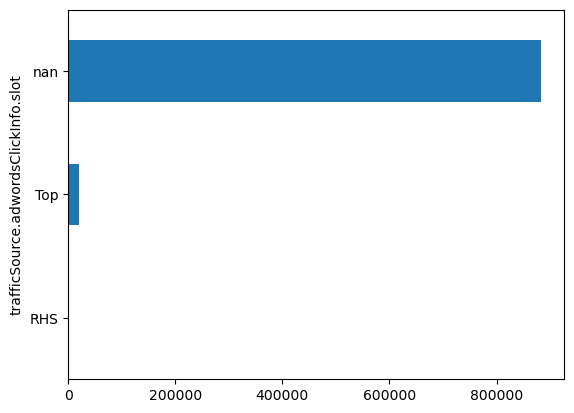

In [43]:
train_df['trafficSource.adwordsClickInfo.slot']\
    .value_counts(dropna=False, ascending=True)\
        .plot.barh();

> - Nếu sử dụng cột dữ liệu này thì ta phải chuyển nó sang kiểu `Categorical`
> và các giá trị bị thiếu sẽ được gom thành 1 nhóm `"other"`.
>
> - Tuy nhiên, các giá trị quan sát được không quá đa dạng và hơn `97%` 
> entry là thiếu dữ liệu nên ta sẽ ưu tiên loại bỏ cột này. 

* `trafficSource.adwordsClickInfo.adNetworkType`

In [45]:
train_df['trafficSource.adwordsClickInfo.adNetworkType'].unique()

array([nan, 'Google Search', 'Search partners'], dtype=object)

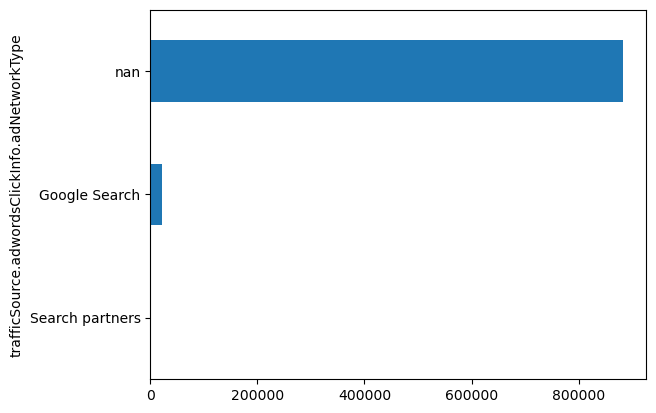

In [47]:
train_df['trafficSource.adwordsClickInfo.adNetworkType']\
    .value_counts(dropna=False, ascending=True)\
        .plot.barh();

> Ta cũng loại bỏ cột này với lý do tương tự như `trafficSource.adwordsClickInfo.slot`

* `trafficSource.adwordsClickInfo.gclId`

Ta quan sát một vài giá trị trong cột này

In [55]:
train_df['trafficSource.adwordsClickInfo.gclId'].unique()

array([nan,
       'Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRBVDYwnFawcmsrhs02pjO7FXPLhzHyvJFv53h1H4QJ8aAhtw8P8HAQ',
       'Cj0KEQjwxqS-BRDRgPLp0q2t0IUBEiQAgfMXRAq0D2zir1iAiqwgFU0lcMGVY6qaqhBTOFSAIW7gM8saAiku8P8HAQ',
       ...,
       'CjwKEAiA17LDBRDElqOGq8vR7m8SJAA1AC0_F8I700U-81N2_1WVZF0O31tFIIq0ZrkCf2QJTXTgHRoCaxXw_wcB',
       'CjwKEAiA17LDBRDElqOGq8vR7m8SJAA1AC0_HT9qtS8geJzhbHcNi9P0HfV_VqljevGJkARlqcV0GxoCkbPw_wcB',
       'CjwKEAiA17LDBRDElqOGq8vR7m8SJAA1AC0_0wzbDX0fd-gzNVm4iuZRBFQ6id5RBK7XQZGOS1kIHRoCXJPw_wcB'],
      dtype=object)

> * [Google Click Identifier (GCLID)](https://support.google.com/google-ads/answer/9744275?hl=en) là một tham số được truyền trong URL với các nhấp chuột quảng cáo, để xác định chiến dịch và các thuộc tính khác liên quan đến quảng cáo. Tham số này cũng được sử dụng để liên kết dữ liệu giữa Google Ads và Google Analytics.
>
> * Do đó, ta sẽ không dùng cột dữ liệu này.

* `trafficSource.referralPath`

Ta quan sát một vài giá trị trong cột này

In [60]:
train_df['trafficSource.referralPath'].value_counts()

trafficSource.referralPath
/                                                                                                                                                                                                                   75523
/yt/about/                                                                                                                                                                                                          71036
/analytics/web/                                                                                                                                                                                                     14620
/yt/about/tr/                                                                                                                                                                                                       14599
/yt/about/vi/                                                                                        

> * [Referral Path](https://neilpatel.com/blog/referral-paths-in-google-analytics/) đề cập
> đến đường dẫn hoặc chuỗi các trang web mà người dùng đã truy cập để đến trang web hiện tại.
>
> * Trong Google Analytics, `Referral Path` cho phép chúng ta xem các trang web khác đã 
> giới thiệu người dùng đến trang web của mình.
>
> * Ta sẽ giữ lại thuộc tính này, vì chỉ có hơn `60%` dữ liệu bị thiếu và ta có 
> thể gom chúng lại thành 1 nhóm.

* `trafficSource.keyword`

Ta quan sát dữ liệu

In [93]:
train_df['trafficSource.keyword'].value_counts(ascending=False, dropna=False)

trafficSource.keyword
NaN                                502929
(not provided)                     366363
6qEhsCssdK0z36ri                    11503
(Remarketing/Content targeting)      2298
1hZbAqLCbjwfgOH7                     2264
                                    ...  
youtubeou tube                          1
bottle image                            1
free google back pack                   1
Google man shirts                       1
Googl store backpack uk                 1
Name: count, Length: 3660, dtype: int64

> Ta thấy tuy dữ liệu hơi lộn xộn nhưng chúng vẫn có ý nghĩa nhất định. 
> 
> ⇨ Do đó ta sẽ giữ lại cột dữ liệu này và cố gắng tìm cách gom nhóm 
> các dữ liệu giống nhau.

Nhưng trước hết, ta có thể gom `NaN` và `(not provided)` thành 1 nhóm `other` vì chúng có ý nghĩa gần giống nhau

In [97]:
train_df['trafficSource.keyword'].replace(['(not provided)', np.NaN], 'other', inplace=True)

* `totals.pageviews`

Ta quan sát một số thông tin của cột này

In [102]:
train_df['totals.pageviews'].describe()

count    903553.000000
mean          3.849764
std           7.025274
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max         469.000000
Name: totals.pageviews, dtype: float64

Ta có thể thay `NaN` bằng giá trị trung bình

In [115]:
# replace NaN with mean value
train_df['totals.pageviews'].replace(np.NaN, train_df['totals.pageviews'].mean(), inplace=True)

# **CHECKPOINT**

In [116]:
train_df.to_csv('../data/interim/last_checkpoint.csv', index=False, na_rep='None')

In [110]:
train_df = pd.read_csv('../data/interim/last_checkpoint.csv', dtype={'fullVisitorId': 'str'})

## 4.6. Phân tích các cột KHÔNG bị thiếu dữ liệu

* `date`

In [146]:
train_df['date'].head()

0    20160902
1    20160902
2    20160902
3    20160902
4    20160902
Name: date, dtype: int64

Ngày đang được viết dưới dạng `YYYYMMDD` ta sẽ chuyển nó về định dạng chuẩn `YYYY-MM-DD`

In [147]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y%m%d')

* Chuyển những dữ liệu "không tồn tại" thảnh "Others" 

In [112]:
pattern = r'\(?.*(not available|not set|none|unknown|0|other).*\)?'
cols_to_modify = [
    'geoNetwork.region', 'geoNetwork.country',
    'geoNetwork.region', 'geoNetwork.subContinent',
    'geoNetwork.continent', 'geoNetwork.city', 
    'geoNetwork.metro', 'geoNetwork.networkDomain',
    'trafficSource.campaign', 'trafficSource.source',
    'trafficSource.medium', 'device.operatingSystem',
    'device.browser',
]

# Replace unknown values with Other
for col in cols_to_modify:
    train_df[col] = train_df[col]\
                        .apply(lambda word: "Others" 
                               if re.match(pattern, word) else word)

---

In [114]:
cols_to_drop = [
    'trafficSource.adwordsClickInfo.slot',
    'trafficSource.adwordsClickInfo.adNetworkType',
    'trafficSource.adwordsClickInfo.gclId',
]
train_df.drop(cols_to_drop, axis='columns', inplace=True)

In [131]:
train_df.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId', 'visitId',
       'visitNumber', 'visitStartTime', 'device.browser',
       'device.operatingSystem', 'device.isMobile', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.networkDomain', 'totals.hits', 'totals.pageviews',
       'totals.transactionRevenue', 'trafficSource.campaign',
       'trafficSource.source', 'trafficSource.medium', 'trafficSource.keyword',
       'trafficSource.referralPath', 'trafficSource.adwordsClickInfo.page',
       'trafficSource.adContent'],
      dtype='object')

# CHECKPOINT

In [2]:
train_df.to_csv('../data/interim/fill_missing.csv', index=False, na_rep='None')

NameError: name 'train_df' is not defined

In [98]:
train_df = pd.read_csv('../data/interim/fill_missing.csv',
                       dtype={'fullVisitorId': 'str'},
                       parse_dates=['date'])

In [4]:
train_df['date']

0        2016-09-02
1        2016-09-02
2        2016-09-02
3        2016-09-02
4        2016-09-02
            ...    
903648   2017-01-04
903649   2017-01-04
903650   2017-01-04
903651   2017-01-04
903652   2017-01-04
Name: date, Length: 903653, dtype: datetime64[ns]

In [8]:
train_df.select_dtypes(include=[np.number]).columns

Index(['visitId', 'visitNumber', 'visitStartTime', 'totals.hits',
       'totals.pageviews', 'totals.transactionRevenue',
       'trafficSource.adwordsClickInfo.page'],
      dtype='object')

___

In [9]:
numeric_features_train = train.select_dtypes(include=[np.number])
numeric_features_train.columns

Index(['date', 'visitId', 'visitNumber', 'visitStartTime'], dtype='object')

In [ ]:
numeric_features_test = test.select_dtypes(include=[np.number])
numeric_features_test.columns

In [ ]:
categorical_features_train = train.select_dtypes(include=[object])
categorical_features_train.columns

In [ ]:
categorical_features_test = test.select_dtypes(include=[object])
categorical_features_test.columns

In [ ]:
colorscale = [[0, 'rgb(102,194,165)'], [0.0005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = train_df["geoNetwork.country"].value_counts().index,
        locationmode = 'country names',
        z = train_df["geoNetwork.country"].value_counts().values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 1)),
            colorbar = dict( title = 'Customer Visits ')
            ) 
       ]

layout = dict(
    height=600,
    title = 'World Wide Customer Visit Distribution',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 50,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
iplot(fig)


In [ ]:
colorscale = [[0, 'rgb(102,194,165)'], [0.0005, 'rgb(102,194,165)'], 
              [0.01, 'rgb(171,221,164)'], [0.02, 'rgb(230,245,152)'], 
              [0.04, 'rgb(255,255,191)'], [0.05, 'rgb(254,224,139)'], 
              [0.10, 'rgb(253,174,97)'], [0.25, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = colorscale,
        showscale = True,
        locations = train_df["geoNetwork.country"].value_counts().index,
        locationmode = 'country names',
        z = train_df["geoNetwork.country"].value_counts().values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 1)),
            colorbar = dict( title = 'Customer Visits ')
            ) 
       ]

layout = dict(
    height=600,
    title = 'World Wide Customer Visit Distribution',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type = 'conic equal area',
            rotation = dict(
                    lon = 50,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(12, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
iplot(fig)

In [ ]:
geo_cols = ["geoNetwork.city", "geoNetwork.country", "geoNetwork.subContinent", "geoNetwork.continent"]
colors = ["#d6a5ff", "#fca6da", "#f4d39c", "#a9fcca"]
traces = []
for i, col in enumerate(geo_cols):
    t = train_df[col].value_counts()
    traces.append(go.Bar(marker=dict(color=colors[i]),orientation="h", y = t.index[:15], x = t.values[:15]))

fig = tools.make_subplots(rows=2, cols=2, 
                          subplot_titles=["Visits: City", "Visits: Country","Visits: Sub Continent","Visits: Continent"]
                          , print_grid=False)
fig.append_trace(traces[0], 1, 1)
fig.append_trace(traces[1], 1, 2)
fig.append_trace(traces[2], 2, 1)
fig.append_trace(traces[3], 2, 2)

fig['layout'].update(height=600,width=1000, showlegend=False)
iplot(fig)

train_df["totals.transactionRevenue"] = train_df["totals.transactionRevenue"].astype('float')

fig = tools.make_subplots(rows=2, cols=2, subplot_titles=["Mean Revenue by City", "Mean Revenue by Country","Mean Revenue by Sub Continent","Mean Revenue by Continent"], print_grid=False)

colors = ["red", "green", "purple","blue"]
trs = []
for i, col in enumerate(geo_cols):
    tmp = train_df.groupby(col).agg({"totals.transactionRevenue": "mean"}).reset_index().rename(columns={"totals.transactionRevenue" : "Mean Revenue"})
    tmp = tmp.dropna()
    tr = go.Bar(x = tmp["Mean Revenue"], orientation="h", marker=dict(opacity=0.5, color=colors[i]), y = tmp[col])
    trs.append(tr)

fig.append_trace(trs[0], 1, 1)
fig.append_trace(trs[1], 1, 2)
fig.append_trace(trs[2], 2, 1)
fig.append_trace(trs[3], 2, 2)

fig['layout'].update(height=600,width=1000, showlegend=False)
iplot(fig)

In [ ]:
t = train_df['channelGrouping'].value_counts()
values1 = t.values 
index1 = t.index
domain1 = {'x': [0.2, 0.50], 'y': [0.0, 0.33]}
fig = {
  "data": [
    {
      "values": values1,
      "labels": index1,
      "domain": {"x": [0, .48]},
    "marker" : dict(colors=["#f77b9c" ,'#ab97db',  '#b0b1b2']),
      "name": "Channel Grouping",
      "hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    }
   ],
  "layout": {"title":"Channel Grouping",
      "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Channel Grouping",
                "x": 0.11,
                "y": 0.5
            }
        ]
    }
}
iplot(fig)

In [ ]:
fig = tools.make_subplots(rows=1, cols=2,subplot_titles=["Traffic Source Campaign (not-set removed)", "Traffic Source Medium"], print_grid=False)
 
colors = ["#d6a5ff", "#fca6da", "#f4d39c", "#a9fcca"]
t1 = train_df["trafficSource.campaign"].value_counts()
t2 = train_df["trafficSource.medium"].value_counts()

tr1 = go.Bar(x = t1.index, y = t1.values, marker=dict(color=colors[1]))
tr2 = go.Bar(x = t2.index, y = t2.values, marker=dict(color=colors[2]))

fig.append_trace(tr1, 1, 1)
fig.append_trace(tr2, 1, 2)


fig['layout'].update(height=400, margin=dict(b=100), showlegend=False)
iplot(fig)

In [104]:
def add_date_features(df):
    # df['date'] = df['date'].astype(str)
    # df["date"] = df["date"].apply(lambda x : x[:4] + "-" + x[4:6] + "-" + x[6:])
    # df["date"] = pd.to_datetime(df["date"])
    
    df["month"]   = df['date'].dt.month
    df["day"]     = df['date'].dt.day
    df["weekday"] = df['date'].dt.weekday
    return df 

In [105]:
train = add_date_features(train_df)

In [ ]:
# Visualization for Visits by date
tmp = train['date'].value_counts().to_frame().reset_index()#.sort_values(by='index')
tmp = tmp.rename(columns = {"index" : "dateX", "date" : "visits"})
tmp["dateX"] = tmp.index

tr = go.Scatter(mode="lines", x = tmp["dateX"].astype(str), y = tmp["visits"])
layout = go.Layout(title="Visits by Date", height=400)
fig = go.Figure(data = [tr], layout = layout)
iplot(fig)
# Visualization for Visits by monthly revenue
tmp = train.groupby("date").agg({"totals.transactionRevenue" : "mean"}).reset_index()
tmp = tmp.rename(columns = {"date" : "dateX", "totals.transactionRevenue" : "mean.revenue"})
tr = go.Scatter(mode="lines", x = tmp["dateX"].astype(str), y = tmp["mean.revenue"])
layout = go.Layout(title="Monthly Revenue by Date", height=400)
fig = go.Figure(data = [tr], layout = layout)
iplot(fig)

In [ ]:
fig = tools.make_subplots(rows=1, cols=3, subplot_titles=["Visits by Month", "Visits by Month Day", "Visits by Week Day"], print_grid=False)
trs = []
for i,col in enumerate(["month", "day", "weekday"]):
    t = train[col].value_counts()
    tr = go.Bar(x = t.index, marker=dict(color=colors[i]), y = t.values)
    trs.append(tr)

fig.append_trace(trs[0], 1, 1)
fig.append_trace(trs[1], 1, 2)
fig.append_trace(trs[2], 1, 3)
fig['layout'].update(height=400, showlegend=False)
iplot(fig)

In [ ]:
tmp1 = train.groupby('month').agg({"totals.transactionRevenue" : "mean"}).reset_index()
tmp2 = train.groupby('day').agg({"totals.transactionRevenue" : "mean"}).reset_index()
tmp3 = train.groupby('weekday').agg({"totals.transactionRevenue" : "mean"}).reset_index()

fig = tools.make_subplots(rows=1, cols=3, subplot_titles=["MeanRevenue by Month", "MeanRevenue by MonthDay", "MeanRevenue by WeekDay"], print_grid=False)
tr1 = go.Bar(x = tmp1.month, marker=dict(color="yellow", opacity=0.5), y = tmp1['totals.transactionRevenue'])
tr2 = go.Bar(x = tmp2.day, marker=dict(color="blue", opacity=0.5), y = tmp2['totals.transactionRevenue'])
tr3 = go.Bar(x = tmp3.weekday, marker=dict(color="violet", opacity=0.5), y = tmp3['totals.transactionRevenue'])

fig.append_trace(tr1, 1, 1)
fig.append_trace(tr2, 1, 2)
fig.append_trace(tr3, 1, 3)
fig['layout'].update(height=400, showlegend=False)
iplot(fig)

In [109]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

agg_dict = {}
for col in ["totals.hits", "totals.pageviews", "totals.transactionRevenue"]:
    train[col] = train[col].astype('float')
    agg_dict[col] = "sum"
tmp = train.groupby("fullVisitorId").agg(agg_dict).reset_index()
tmp.head()

,fullVisitorId,totals.hits,totals.pageviews,totals.transactionRevenue
0,0000010278554503158,11.0,8.0,0.0
1,0000020424342248747,17.0,13.0,0.0
2,0000027376579751715,6.0,5.0,0.0
3,0000039460501403861,2.0,2.0,0.0
4,0000040862739425590,5.0,5.0,0.0


In [ ]:
non_zero = tmp[tmp["totals.transactionRevenue"] > 0]["totals.transactionRevenue"]
print ("There are " + str(len(non_zero)) + " visitors in the train dataset having non zero total transaction revenue")

plt.figure(figsize=(10,6))
sns.displot(non_zero)
plt.title("Distribution of Non-Zero Total Transactions");
plt.xlabel("Total Transactions");

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(np.log1p(non_zero))
plt.title("Natural Log Distribution of Non Zero Total Transactions");
plt.xlabel("Natural Log - Total Transactions");

In [112]:
## find constant columns
constant_columns = []
for col in train.columns:
    if len(train[col].value_counts()) == 1:
        constant_columns.append(col)

## non relevant columns
non_relevant = ["visitNumber", "date", "fullVisitorId", "sessionId", "visitId", "visitStartTime"]

In [113]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [c for c in train.columns if not c.startswith("total")]
categorical_columns = [c for c in categorical_columns if c not in constant_columns + non_relevant]
for c in categorical_columns:

    le = LabelEncoder()
    train_vals = list(train[c].values.astype(str))
    
    le.fit(train_vals)
    
    train[c] = le.transform(train_vals)

In [114]:
def normalize_numerical_columns(df):
    df["totals.hits"] = df["totals.hits"].astype(float)
    df["totals.hits"] = (df["totals.hits"] - min(df["totals.hits"])) / (max(df["totals.hits"]) - min(df["totals.hits"]))

    df["totals.pageviews"] = df["totals.pageviews"].astype(float)
    df["totals.pageviews"] = (df["totals.pageviews"] - min(df["totals.pageviews"])) / (max(df["totals.pageviews"]) - min(df["totals.pageviews"]))
    
    # df["totals.transactionRevenue"] = df["totals.transactionRevenue"].fillna(0.0)
    return df 

In [115]:
train = normalize_numerical_columns(train)

In [116]:
from sklearn.model_selection import train_test_split
features = [c for c in train.columns if c not in constant_columns + non_relevant]
features.remove("totals.transactionRevenue")

train["totals.transactionRevenue"] = np.log1p(train["totals.transactionRevenue"].astype(float))
train_x, valid_x, train_y, valid_y = train_test_split(train[features], train["totals.transactionRevenue"], 
                                                      test_size=0.25, random_state=24)

In [117]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((677739, 24), (225914, 24), (677739,), (225914,))

In [118]:
import lightgbm as lgb 

lgb_params = {"objective" : "regression", "metric" : ["rmse", "mse", "mae"],
              "num_leaves": 30, "learning_rate" : 0.1, 
              "bagging_fraction" : 0.7, "feature_fraction" : 0.5,
              "force_col_wise": True, "min_child_samples" : 100,
              }


lgb_train = lgb.Dataset(train_x, label=train_y)
lgb_val = lgb.Dataset(valid_x, label=valid_y)
model = lgb.train(lgb_params, lgb_train, 1000, valid_sets=[lgb_val],
                  # early_stopping_rounds=150, 
                  # verbose_eval=20
                  )

[LightGBM] [Info] Total Bins 1808
[LightGBM] [Info] Number of data points in the train set: 677739, number of used features: 24
[LightGBM] [Info] Start training from score 0.228010


In [119]:
model.best_score["valid_0"]

OrderedDict([('rmse', 1.6579315217483463),
             ('l2', 2.748736930806788),
             ('l1', 0.33777191702398623)])

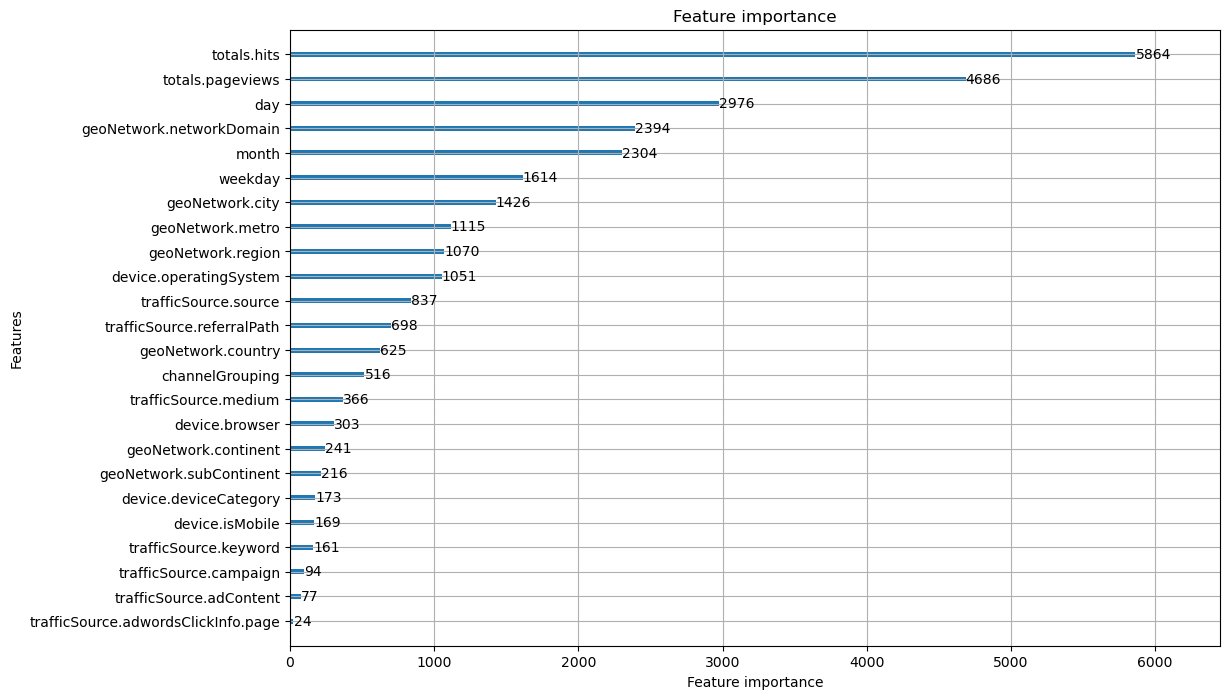

In [120]:
# How to get score from lightgbm model
lgb.plot_importance(model, max_num_features=30, figsize=(12,8));